APRENDIZAJE AUTOMÁTICO

POR QUÉ IBAMOS A TENER QUE PONER LOS VALORES ÚNICOS SI YA SE NOS MUESTRAN EN LA DESCRIPCION.TXT?
Quitamos outliers estaría SUPER CHULO seleccionar todas aquellas columnas que puedan tener outliers y  eliminar todas las filas del tirón con estos de la tabla
modificamos nan de cualquier var
Variables numéricas estudiar valores máximos y mínimos

Identifica valores únicos de la columna 

• El tipo (categórica sin orden, categórica con orden, discreto o continuo).

• Si hay valores nulos o no (puedes utilizar la salida de la pregunta 3 o buscar específicamente en la columna a tratar). 

• En caso de que la columna tenga valores nulos, el tratamiento que se te ocurre para trabajar con ellos. 

• Si la columna es numérica obtén valores mínimo y máximo; estudia si hay outliers.

• Especifica si decides o no eliminar la columna, porque su aportación puede ser irrelevante en procesos de modelado posteriores. 

• Si es necesaria una recodificación de la columna, por ser categórica u otra razón, explica por qué se hace esta conversión y qué método empleas para llevarla a cabo.




In [3]:
import numpy as np ; import seaborn as sns; import pandas as pd; import matplotlib
pd.set_option('display.max_columns',30)
pd.set_option('display.max_rows',100)
try:
    data = pd.read_csv('C:/Users/juanj/Documents/3ercuatri/aprendizaje automatico/dataset_housing.csv')
except:
    data = pd.read_csv('C:/Users/juanj/OneDrive/Documentos/3er cuatri/dataset_housing.csv')
    

data[['Id','MSSubClass','MSZoning','LotFrontage','LotArea','Street','Alley','LotShape','LandContour','Utilities','LandSlope','Neighborhood','YearBuilt' ,'YearRemodAdd','GarageCars','GarageArea','GarageQual','GarageCond','GarageType','GarageYrBlt','GarageFinish','OverallQual','OverallCond','SalePrice']]
pd.set_option('display.max_rows',None)

#data.Alley = data.Alley.replace({'nan': 'No access'})
data.fillna({x:'NO ACCESS' for x in ['Alley']}, inplace=True)
data.head(10)


#combiar los nan de variables categoricas a lo mejor por la moda
#get_dummies
#justificar que no hay outliers despues de ver que , por ejemplo, con los datos numericos pasados por la transformación logarítimico,
#obtenemos una matriz de correlaciónb donde podemos justificar que aquellos valores con mucha area no son atípicos, 
#sino que esa muestra es verosímil ya que son casas con un precio muy alto

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NO ACCESS,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,...,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NO ACCESS,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,...,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NO ACCESS,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,...,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NO ACCESS,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,...,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NO ACCESS,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,...,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
5,6,50,RL,85.0,14115,Pave,NO ACCESS,IR1,Lvl,AllPub,Inside,Gtl,Mitchel,Norm,Norm,...,40,30,0,320,0,0,NaN,MnPrv,Shed,700,10,2009,WD,Normal,143000
6,7,20,RL,75.0,10084,Pave,NO ACCESS,Reg,Lvl,AllPub,Inside,Gtl,Somerst,Norm,Norm,...,255,57,0,0,0,0,NaN,NaN,NaN,0,8,2007,WD,Normal,307000
7,8,60,RL,NaN,10382,Pave,NO ACCESS,IR1,Lvl,AllPub,Corner,Gtl,NWAmes,PosN,Norm,...,235,204,228,0,0,0,NaN,NaN,Shed,350,11,2009,WD,Normal,200000
8,9,50,RM,51.0,6120,Pave,NO ACCESS,Reg,Lvl,AllPub,Inside,Gtl,OldTown,Artery,Norm,...,90,0,205,0,0,0,NaN,NaN,NaN,0,4,2008,WD,Abnorml,129900
9,10,190,RL,50.0,7420,Pave,NO ACCESS,Reg,Lvl,AllPub,Corner,Gtl,BrkSide,Artery,Artery,...,0,4,0,0,0,0,NaN,NaN,NaN,0,1,2008,WD,Normal,118000


4.ANÁLISIS DE LAS VARIABLES DEL DATASET DE VIVIENDAS

1.Id: se trata de una variable no numérica discreta?, ya que no se usan los números para establecer un orden sino para identificar nuestras muestras. El rango del id coge valores desde 1 a 1460 y se asigna según la posición de la fila en la tabla. Como ya tenemos una columna mostrándonos el index de las filas, podemos prescindir de dicha columna.(no creo )

• MSZoning : Esta variable categórica clasifica de forma general la zona en la que se encuentra la vivienda. No hay valores nulos y la mayoría de casas pertenecen al grupo de RL (residencial de baja densidad de población).

• LotArea : Es una variable numérica que nos indica el área de la vivienda en pies cuadrados. En la tabla no encontramos ningún valor nulo. En cuanto a los outliers, encontramos 69 filas con outliers; la gran mayoría de estos se sitúa por encima de lo normal.

• Alley :Esta columna, que traducida al español sería ‘callejón’ posee casi en su totalidad valores NaN, aunque esto no significa que no tengamos toda esa información: en este caso podemos ver cómo Pandas ha confundido el valor NA (No Alley Access) con NaN, así que procedemos a modificar dicha columna del DataFrame para quitar los NaN por No access. De hecho, si abrimos el csv sin pandas, podemos visualizar que pone en siempre NA en vez de NaN, por lo que Pandas manipula esta columna de forma errónea.

• LandContour : Variable categorica que indica cómo de llano es el terreno de la propiedadNo tiene nan 
• LandSlope 
No tiene nan
• YearBuilt: Encontramos casas construidas desde 1872 hasta 2010, la mayoría de las casas del DataFrame fueron construidas después del año 2000. Además, no encontramos valores nulos. Si hacemos un tratamiento de outliers nos salen algunas casas de la década de 1870, pero no son realmente outliers ya que las casas fueron todas construidas entre 1872 y 2010 (por ejemplo, un dato que sí clasificaríamos como atípico sería una casa construida en 1492). La media del año de contrucción es 1971.

 • YearRemodAdd: Se refiere a una fecha en la que se remodeló la casa. La media del año de remodelación es 1985

• OverallQual: Es una calificación que puede coger valores del uno al diez que se refiere al acabado de la casa y l .materiales usados para construirla. En el DataFrame encontramos solo dos casas con un rate de 1.
•SalePrice


In [4]:
data

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NO ACCESS,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,...,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NO ACCESS,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,...,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NO ACCESS,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,...,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NO ACCESS,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,...,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NO ACCESS,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,...,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
5,6,50,RL,85.0,14115,Pave,NO ACCESS,IR1,Lvl,AllPub,Inside,Gtl,Mitchel,Norm,Norm,...,40,30,0,320,0,0,NaN,MnPrv,Shed,700,10,2009,WD,Normal,143000
6,7,20,RL,75.0,10084,Pave,NO ACCESS,Reg,Lvl,AllPub,Inside,Gtl,Somerst,Norm,Norm,...,255,57,0,0,0,0,NaN,NaN,NaN,0,8,2007,WD,Normal,307000
7,8,60,RL,NaN,10382,Pave,NO ACCESS,IR1,Lvl,AllPub,Corner,Gtl,NWAmes,PosN,Norm,...,235,204,228,0,0,0,NaN,NaN,Shed,350,11,2009,WD,Normal,200000
8,9,50,RM,51.0,6120,Pave,NO ACCESS,Reg,Lvl,AllPub,Inside,Gtl,OldTown,Artery,Norm,...,90,0,205,0,0,0,NaN,NaN,NaN,0,4,2008,WD,Abnorml,129900
9,10,190,RL,50.0,7420,Pave,NO ACCESS,Reg,Lvl,AllPub,Corner,Gtl,BrkSide,Artery,Artery,...,0,4,0,0,0,0,NaN,NaN,NaN,0,1,2008,WD,Normal,118000


In [2]:

pd.set_option('display.max_rows',500)
print(type(data.isnull().sum()))
tabla_nules=pd.DataFrame(data.isnull().sum())  #con esto vemos los nan en cada columna
#es necesario para quitar las filas con ceros hacer a la variable 'a' un dataframe?
tabla_nules = tabla_nules[tabla_nules.iloc[:,0] != 0]
#tabla_nules=pd.DataFrame(data.isnull().sum())  #con esto vemos los nan en cada columna
pd.set_option('display.max_rows',None)  #AQUÍ NO SALE TODO POQUE 
#tabla_nules
print(data['LotArea'].isnull().any())


data['LandContour'].hist()

#Columnas con nan

NameError: name 'pd' is not defined

In [6]:
def saco_outliers(df,columna): 
  #despues de sacar los outliers sacas el minimo y el maximo.
  def is_outlier_IQR(df):
      Q1=df.quantile(0.25)
      Q3=df.quantile(0.75)
      IQR = Q3-Q1
      return (df<(Q1-1.5*IQR)) | (df>(Q3+1.5*IQR))

  tabla_outliers=(is_outlier_IQR(data[columna]))  #.sum() 

  filas_outl=[]
  for ind,boole in tabla_outliers.items():  #hay 69 outliers
      if boole==True: filas_outl.append(ind)

  return df[columna].iloc[filas_outl]  #columnas con outliers: YearBuilt, LotArea
                                       #columnas sin: YearRemodAdd
log_lotarea=pd.DataFrame(np.log(data['LotArea']))


print('aaaa')
print(saco_outliers(data, 'LotArea'))




aaaa
53       50271
66       19900
113      21000
120      21453
159      19378
171      31770
185      22950
197      25419
249     159000
260      19296
271      39104
277      19138
304      18386
313     215245
335     164660
349      20431
364      18800
384      53107
411      34650
417      22420
422      21750
451      70761
457      53227
523      40094
529      32668
558      21872
563      21780
588      25095
661      46589
664      20896
666      18450
691      21535
692      26178
706     115149
726      21695
769      53504
807      21384
828      28698
848      45600
854      17920
876      25286
934      27650
939      24090
943      25000
956       1300
1010     21286
1039      1477
1048     21750
1057     29959
1061     18000
1107     23257
1151     17755
1169     35760
1173     18030
1184     35133
1190     32463
1230     18890
1260     24682
1270     23595
1277     17871
1287     36500
1298     63887
1346     20781
1383     25339
1396     57200
1409     20544
1423 

max    215245.0
Name: LotArea, dtype: float64

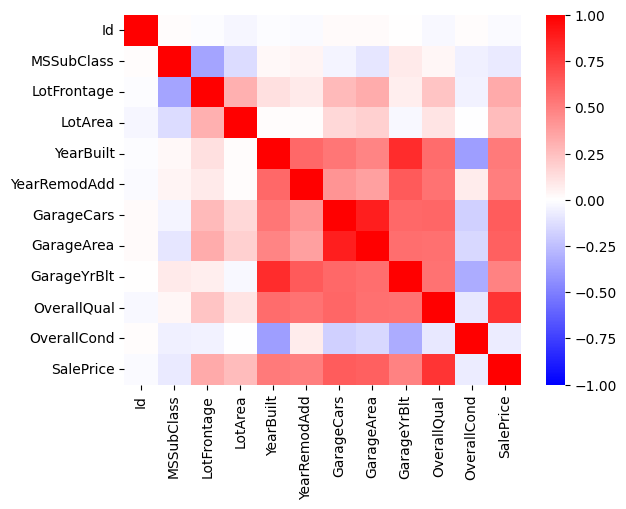

In [5]:
data.fillna({x:data['LotFrontage'].mean() for x in ['LotFrontage']}, inplace=True)
new_data = pd.DataFrame(data[['Id','MSSubClass','MSZoning','LotFrontage','LotArea','Street','Alley','LotShape','LandContour','Utilities','LandSlope','Neighborhood','YearBuilt' ,'YearRemodAdd','GarageCars','GarageArea','GarageQual','GarageCond','GarageType','GarageYrBlt','GarageFinish','OverallQual','OverallCond','SalePrice']])
data_num = new_data.loc[:,new_data.dtypes != object]
data_num.corr()
sns.heatmap(data_num.corr(), cmap="bwr", vmin=-1, vmax=1)


data['LotArea'].describe().T[['max']]


In [109]:

pd.get_dummies(data,columns='Alley',dtype= int) 
data
#data.drop('Alley',axis=1,inplace=True)



TypeError: Input must be a list-like for parameter `columns`

In [95]:
dummies_alley

,Grvl,NO ACCESS,Pave
0,0,1,0
1,0,1,0
2,0,1,0
3,0,1,0
4,0,1,0
5,0,1,0
6,0,1,0
7,0,1,0
8,0,1,0
9,0,1,0
